# Aprendizaje no supervizado

**Preámbulo y datos**

In [3]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# fruits dataset
fruits = pd.read_table('Data/fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1

## K-means


<IPython.core.display.Javascript object>


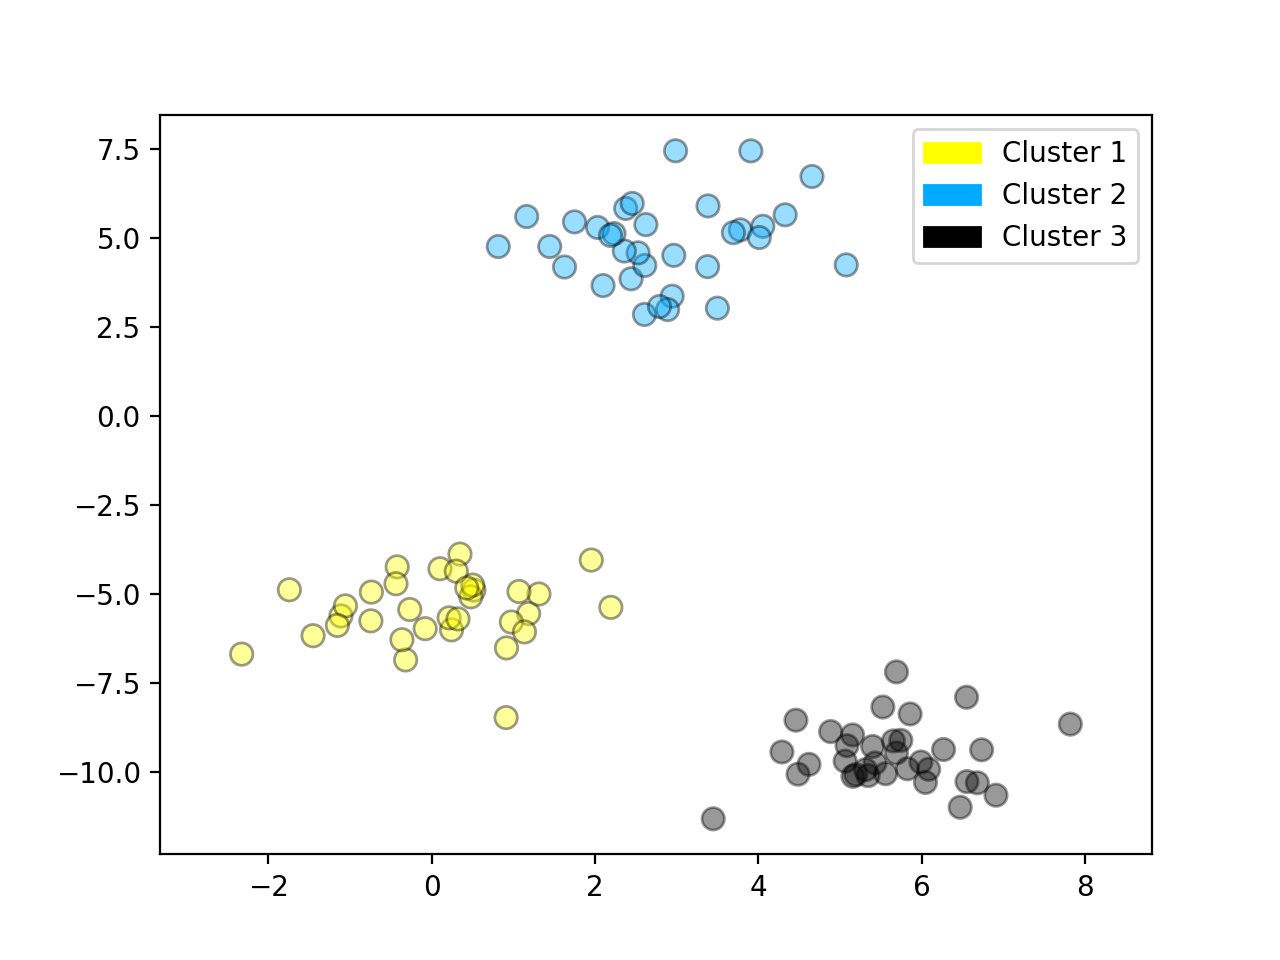

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

Ejemplo que muestra k-medias para encontrar 4 conglomerados en el conjunto de datos de frutas. Tenga en cuenta que, en general, es importante escalar las características individuales antes de aplicar la agrupación en clústeres de k-medias.

<IPython.core.display.Javascript object>


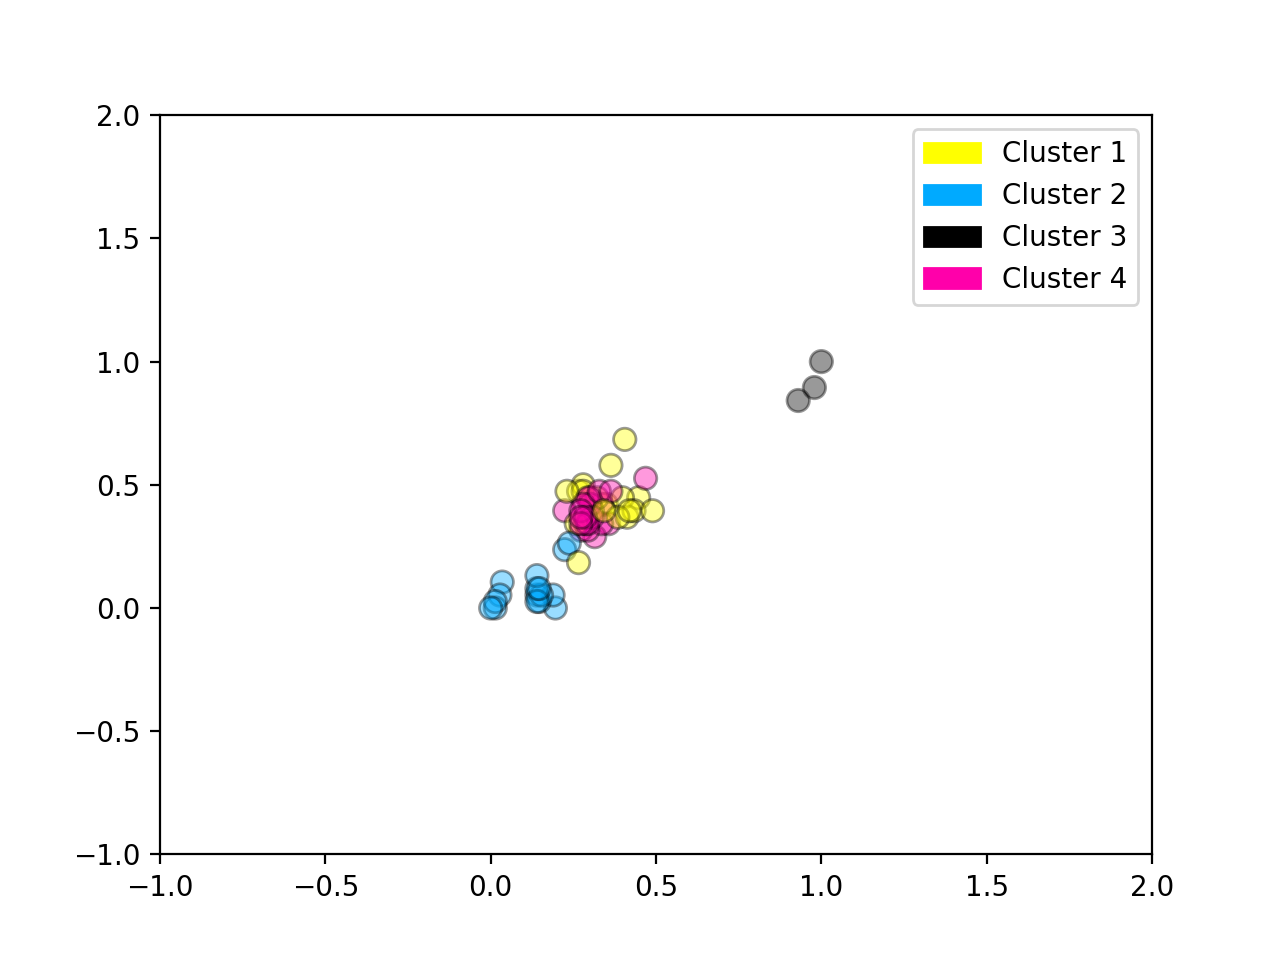

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('Data/fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']].to_numpy()
y_fruits = fruits[['fruit_label']] - 1

X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_fruits_normalized)

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

<IPython.core.display.Javascript object>


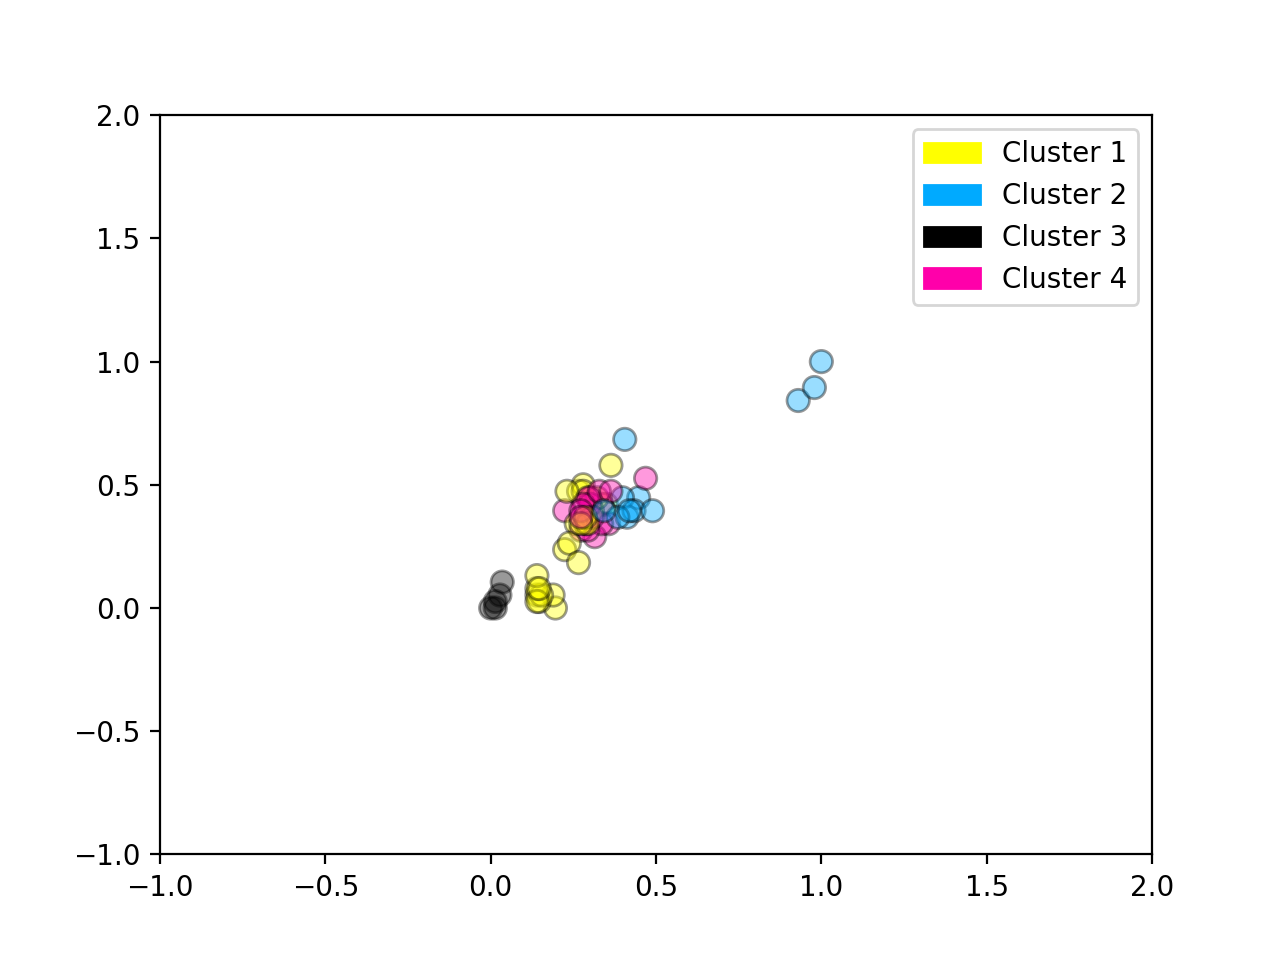

In [8]:
# https://scikit-learn-extra.readthedocs.io/en/latest/index.html
from sklearn_extra.cluster import KMedoids
kmedoides = KMedoids(n_clusters = 4, random_state = 0)
kmedoides.fit(X_fruits_normalized)

plot_labelled_scatter(X_fruits_normalized, kmedoides.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

## Aglomerativo

<IPython.core.display.Javascript object>


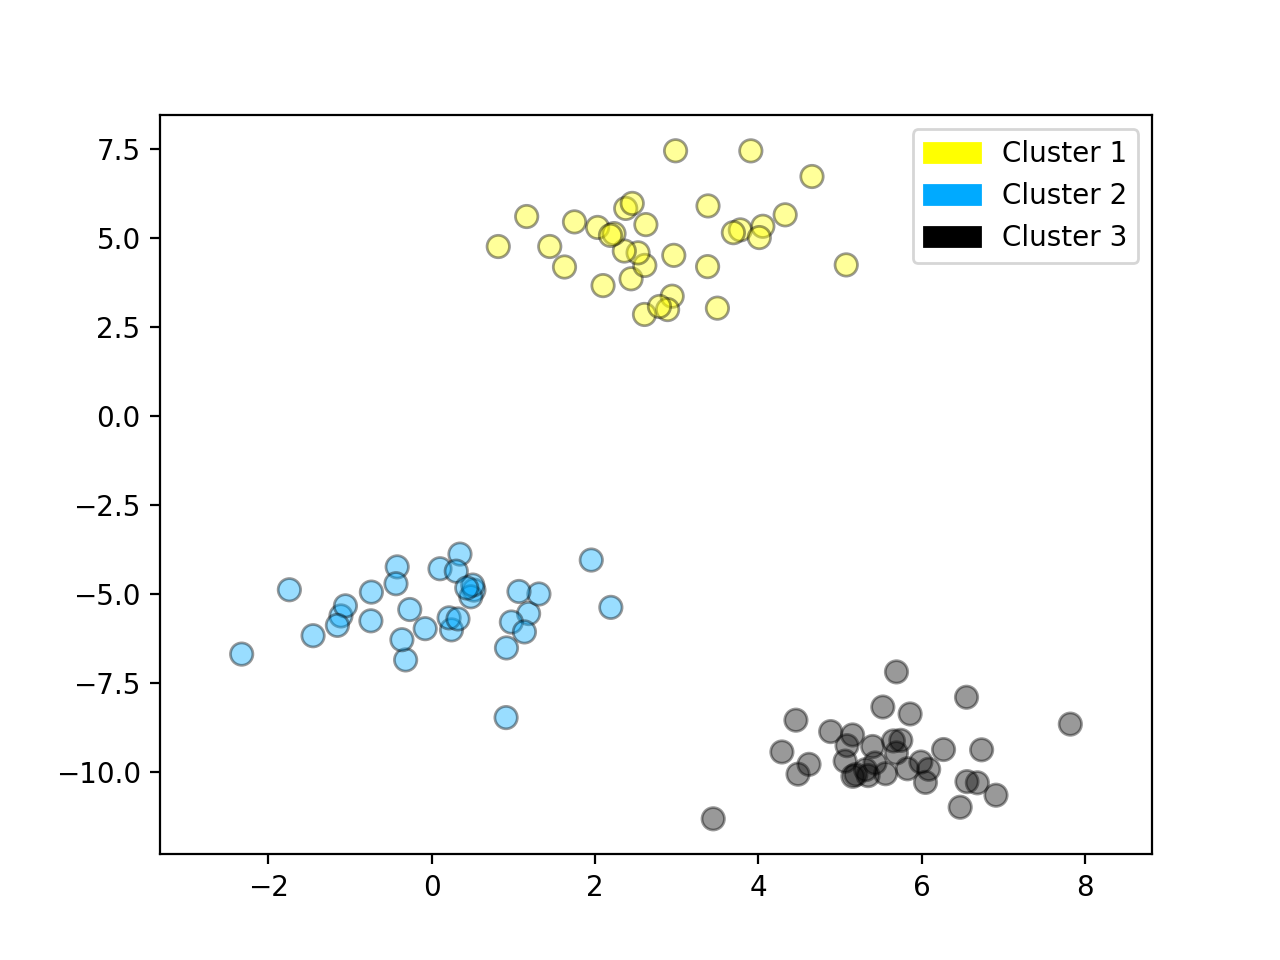

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

**Creamos el dendograma**

<IPython.core.display.Javascript object>


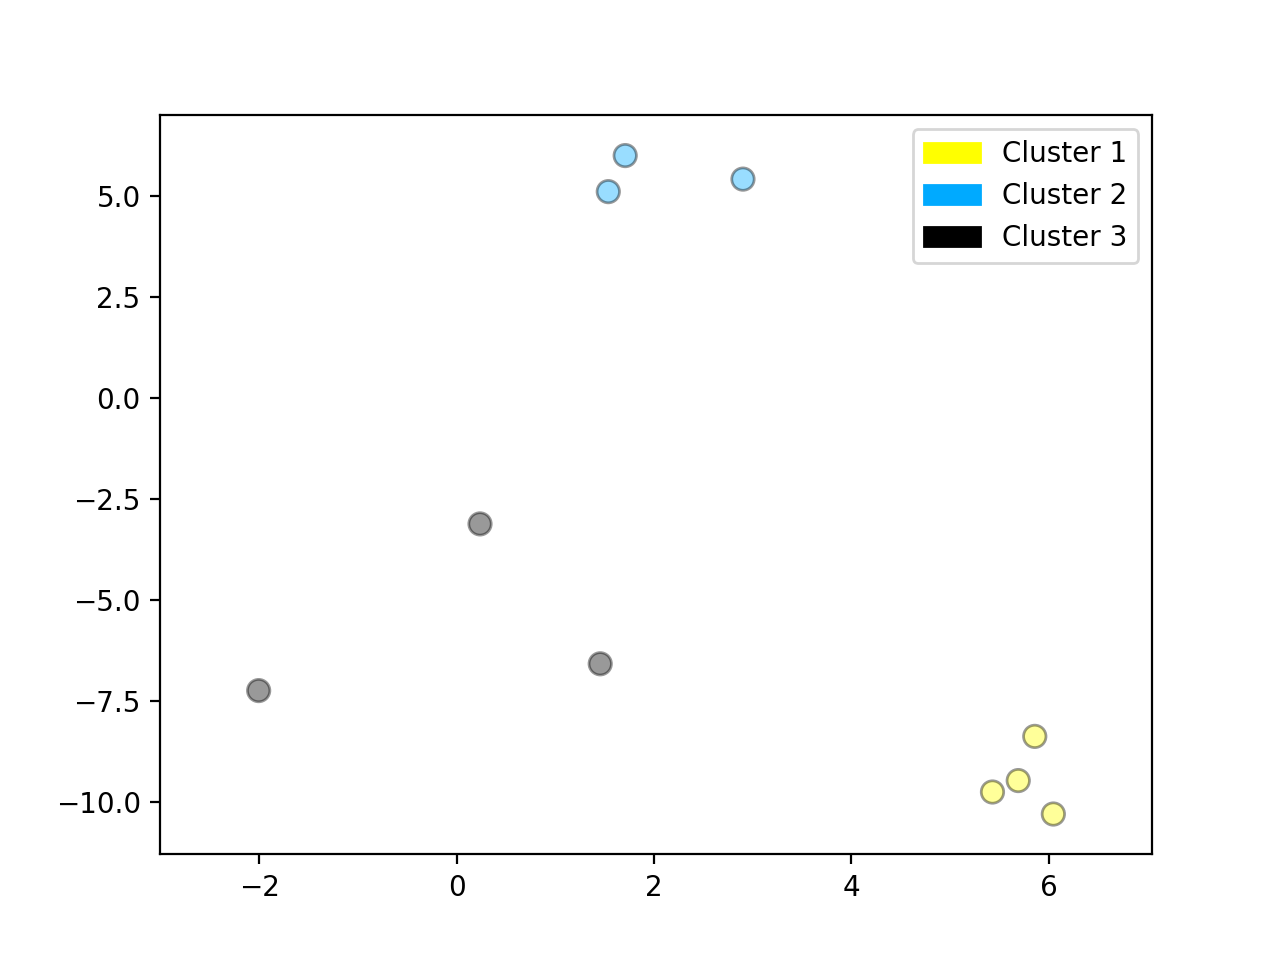

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [10]:
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

<IPython.core.display.Javascript object>


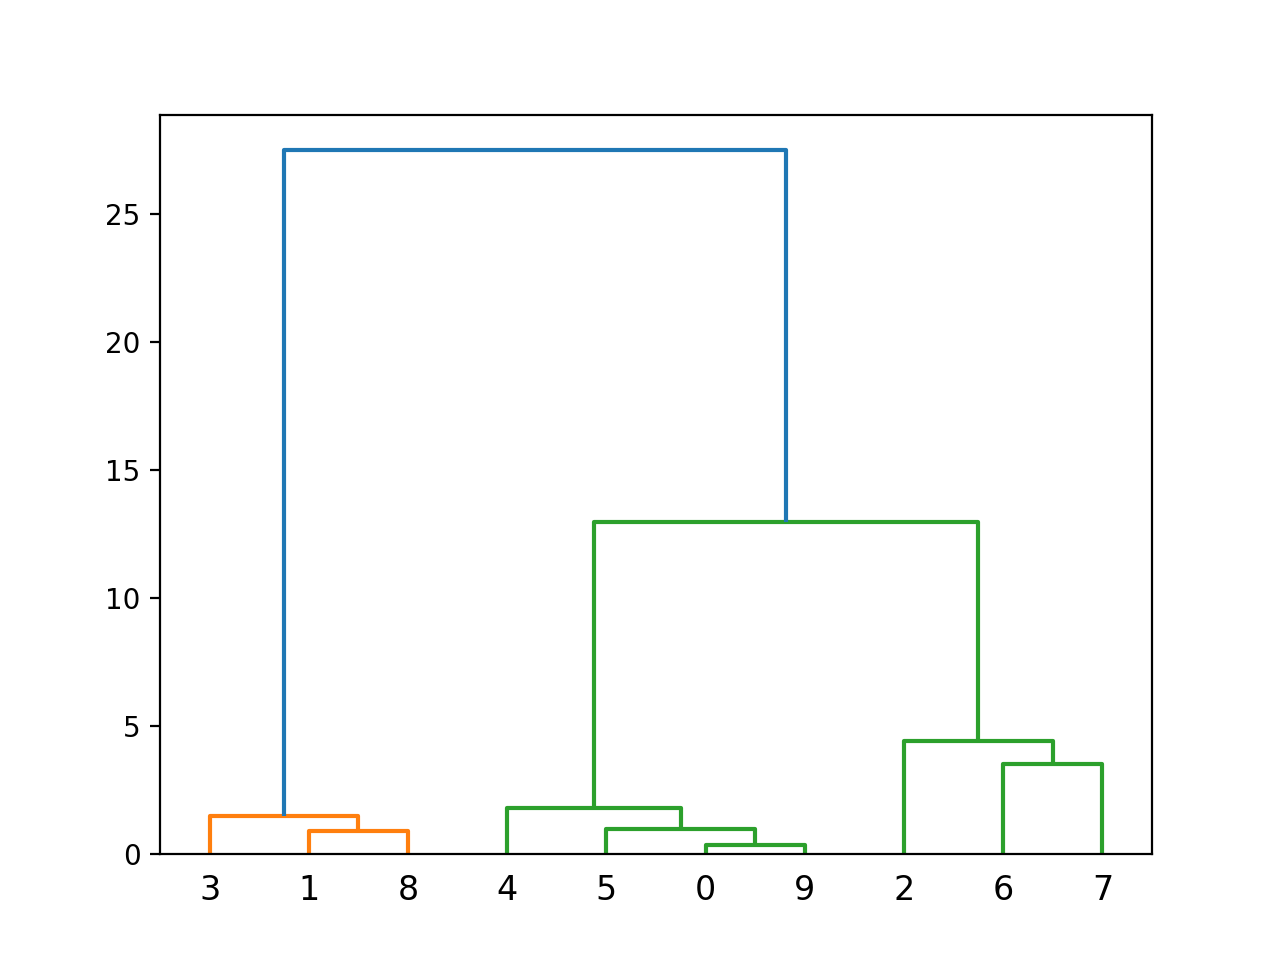

In [11]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

## DBSCAN clustering

Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


<IPython.core.display.Javascript object>


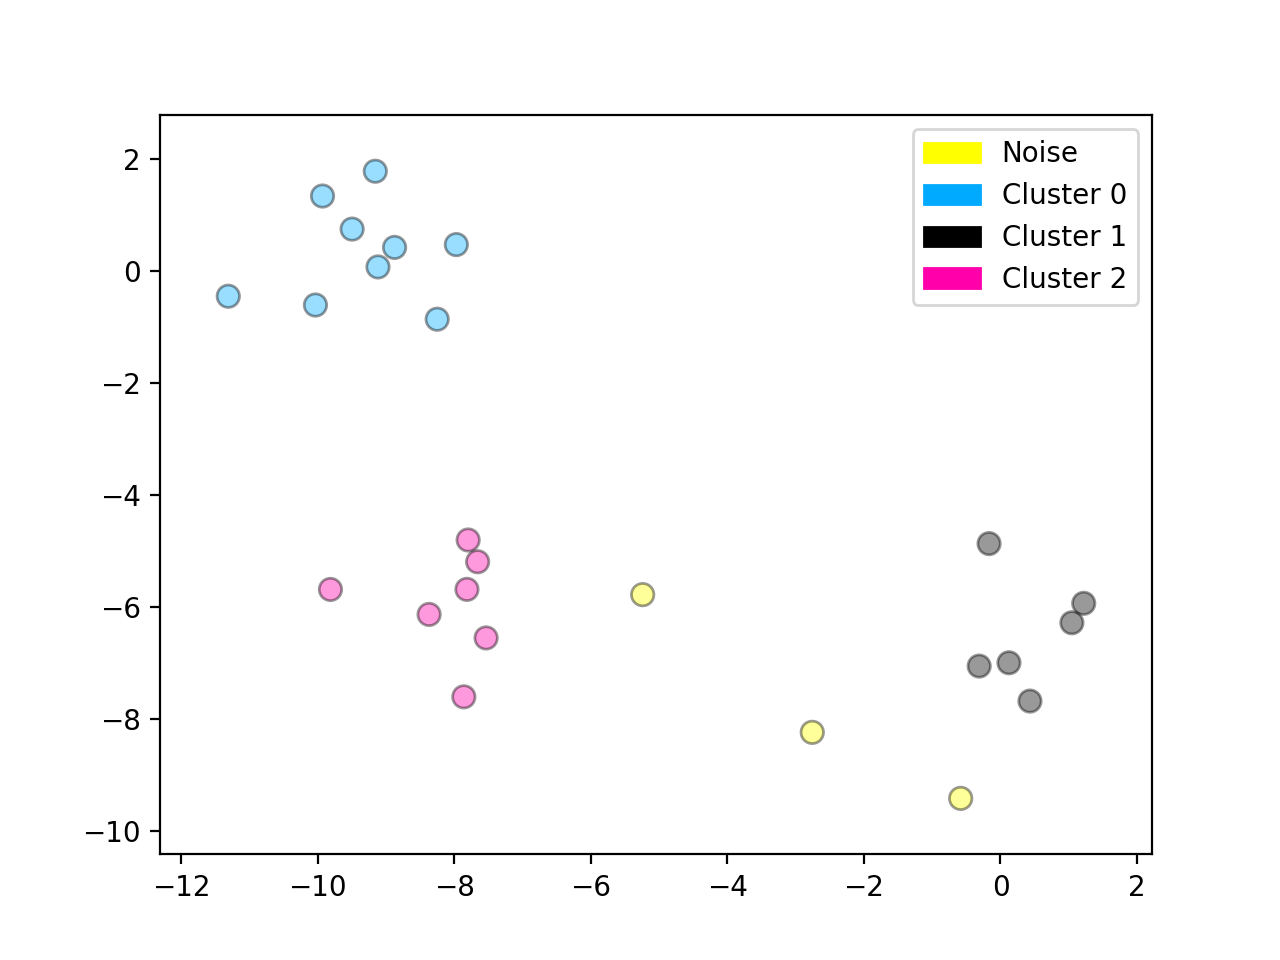

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

**Otro ejemplo**

In [13]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/Mall_Customers.csv"
datos = pd.read_csv(uu)


dbDat = datos.iloc[:,3:5]
dbDat.describe()

,AnnualIncome,SpendingScore
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


<IPython.core.display.Javascript object>


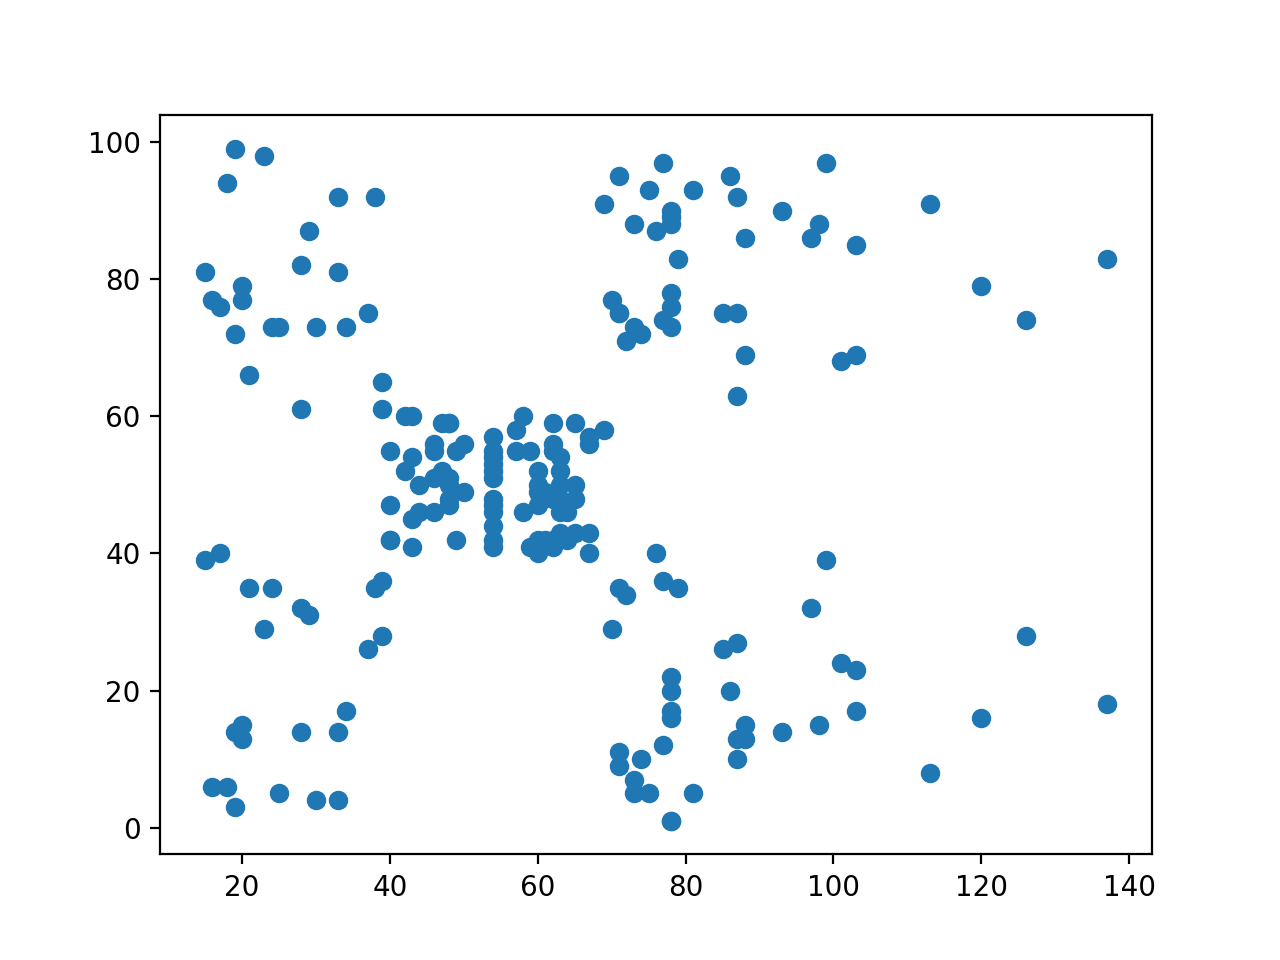

In [14]:
plt.figure()
plt.scatter(dbDat.AnnualIncome,dbDat.SpendingScore)
plt.show()

<IPython.core.display.Javascript object>


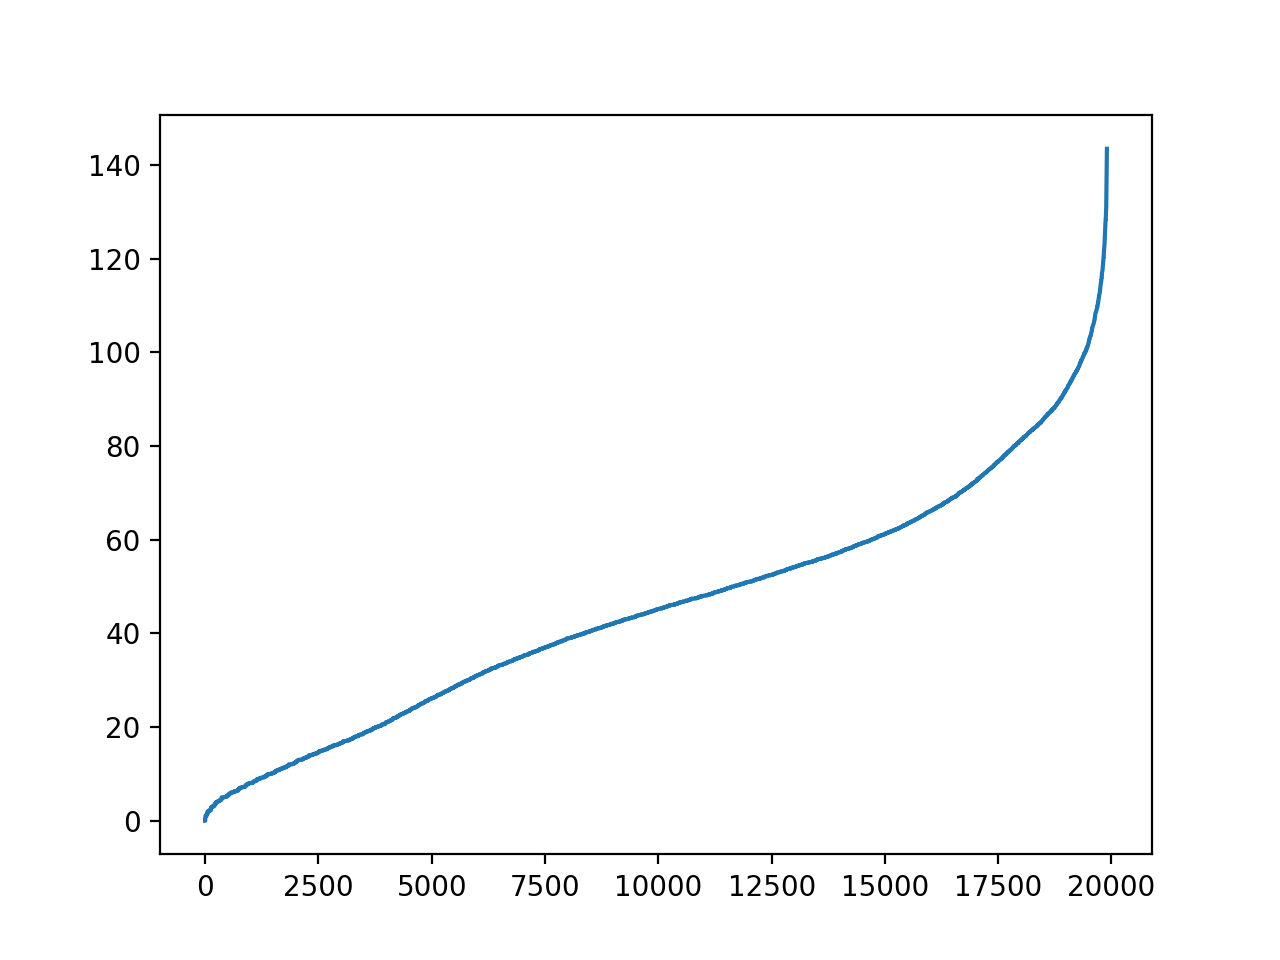

In [15]:
from scipy.spatial import distance_matrix
dd = pd.DataFrame(distance_matrix(dbDat.values, dbDat.values), index=dbDat.index, columns=dbDat.index)
n = len(np.sort(dd.values))
dd = np.sort(dd.values[np.triu_indices(n, k = 1)])

plt.figure()
plt.plot(dd)
plt.show()

Cluster membership values:
[ 0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  2  0  2  0  2  3  2  3  2  0  2  3  2  3  2  3  2  3  2  0  2
  3  2  0  2  3  2  3  2  3  2  3  2  3  2  3  2  0  2  3  2  3  2  3  2
  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3 -1  3  2  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


<IPython.core.display.Javascript object>


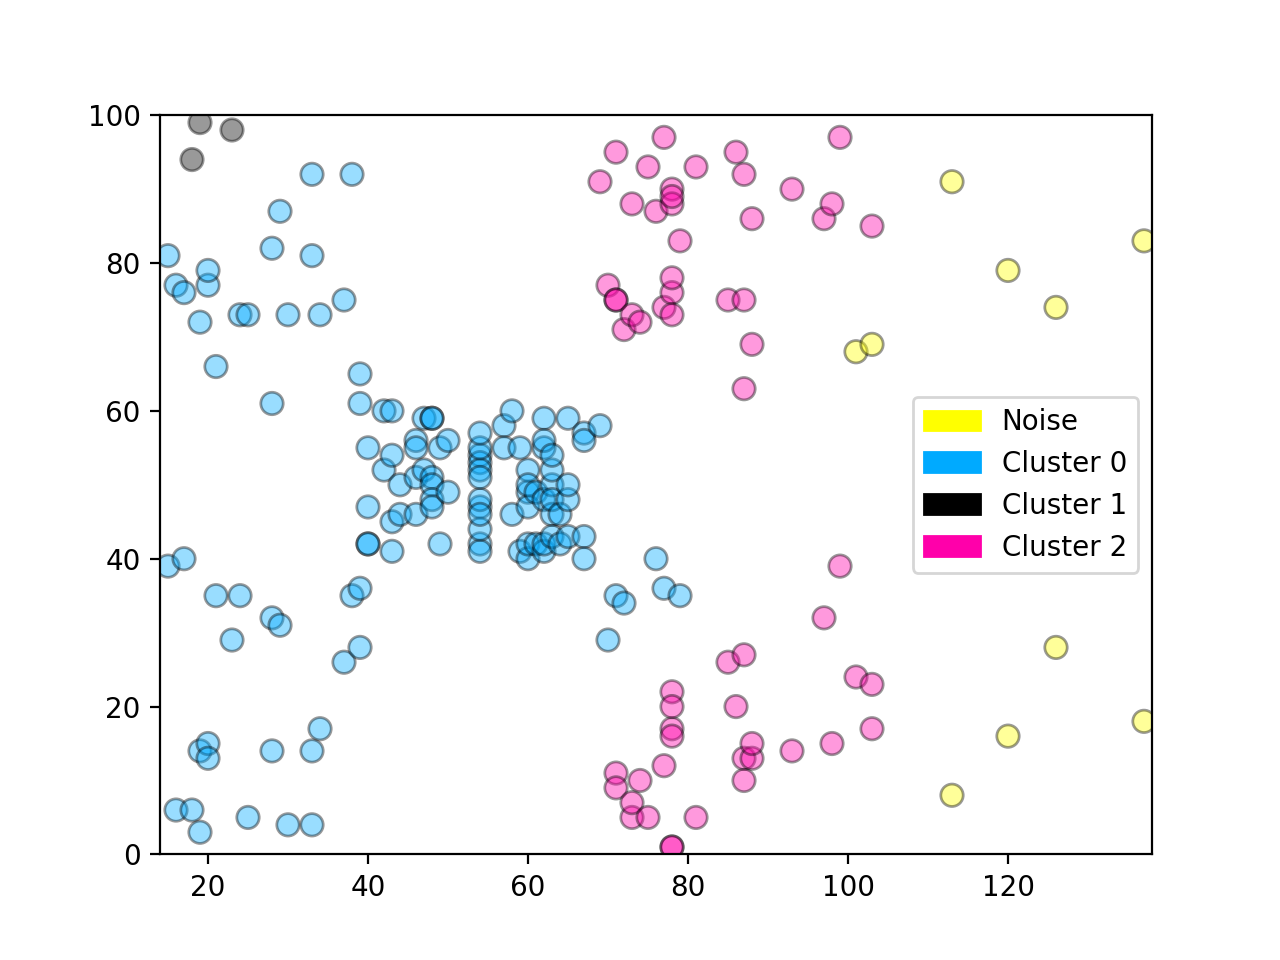

In [16]:
dbscan = DBSCAN(eps = 10, min_samples = 3)

cls = dbscan.fit_predict(dbDat)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(dbDat.values, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])


**Un ejemplo combinado**

In [19]:
www = "https://stat.ethz.ch/Teaching/Datasets/WBL/crime2.dat"
crime = pd.read_csv(www,sep=" ")
crime.describe()

,murder,rape,robbery,assault,burglary,larceny,auto.theft
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,7.444000,25.73400,124.092000,211.300000,1291.904000,2671.288000,377.526000
std,3.866769,10.75963,88.348567,100.253049,432.455711,725.908707,193.394418
min,0.900000,9.00000,13.300000,43.800000,446.100000,1239.900000,144.400000
25%,4.225000,18.32500,64.950000,148.850000,1000.075000,2248.900000,245.775000
50%,7.300000,24.10000,106.050000,197.600000,1265.050000,2617.450000,333.850000
75%,10.100000,32.52500,155.850000,282.575000,1529.825000,3007.600000,460.125000
max,15.800000,51.60000,472.600000,485.300000,2453.100000,4467.400000,1140.100000


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(crime).transform(crime) 

varianza explicada [0.58785136 0.17696026]


<IPython.core.display.Javascript object>


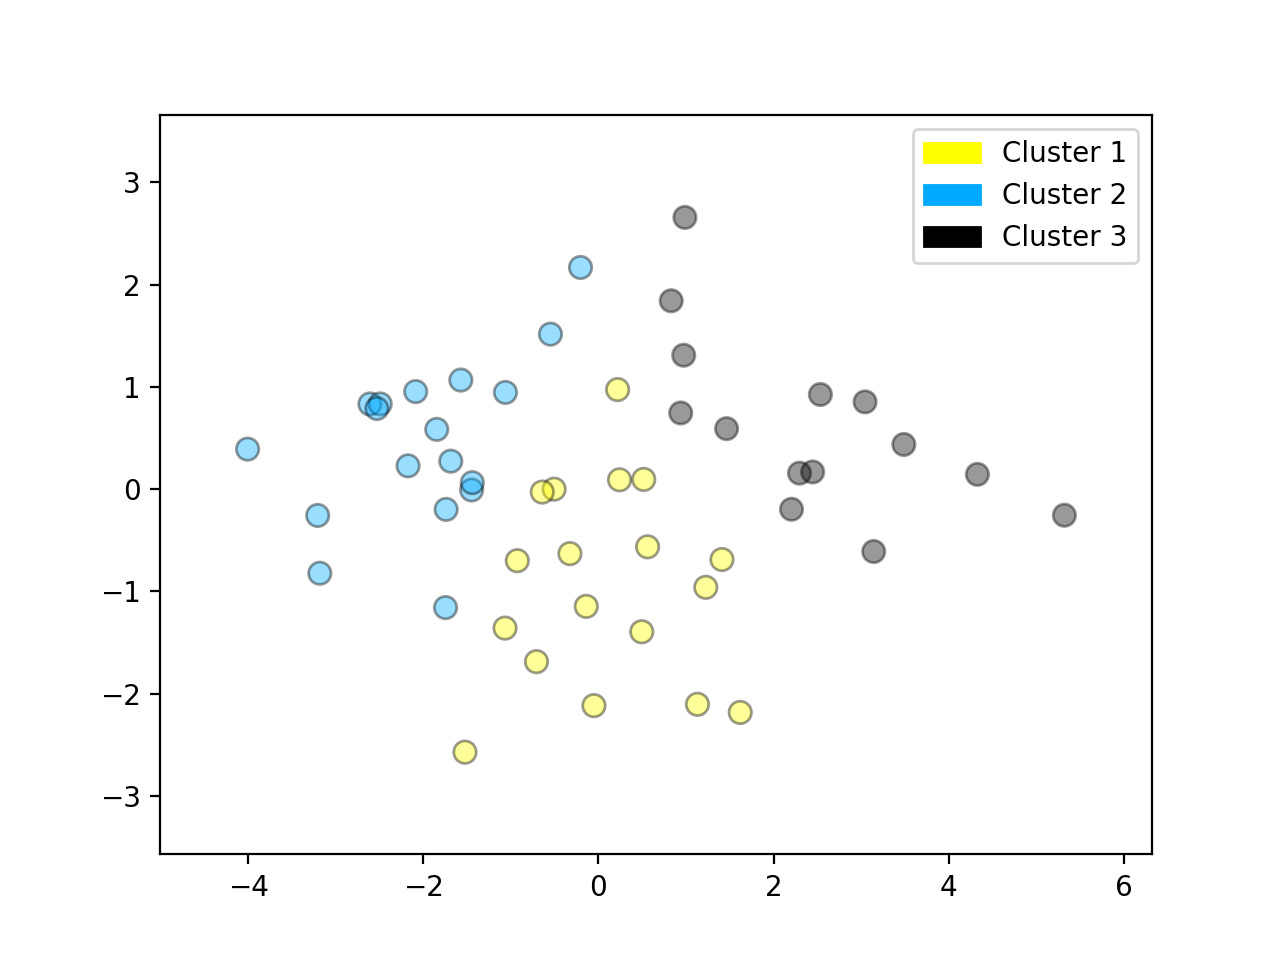

In [21]:
pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized) # nuevos componentes
print('varianza explicada',pca.explained_variance_ratio_) # vaianza explicada

grupos = KMeans(n_clusters = 3)
grupos.fit(X_pca)

plot_labelled_scatter(X_pca, grupos.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


[-1  0  1  2]


<IPython.core.display.Javascript object>


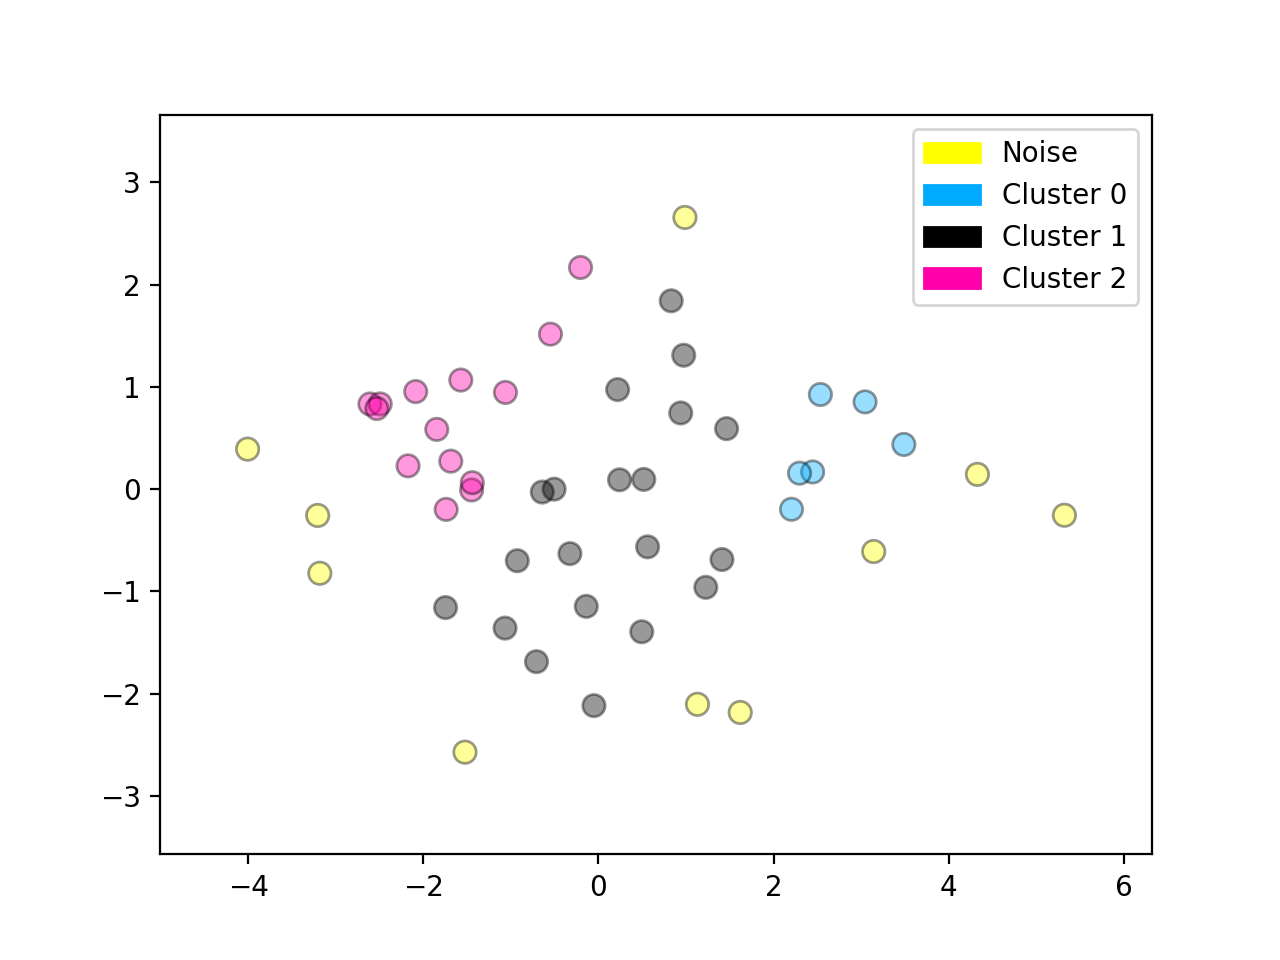

In [22]:
dbscan = DBSCAN(eps = 0.8, min_samples = 3)

cls = dbscan.fit_predict(X_pca)
print(np.unique(cls))
plot_labelled_scatter(X_pca, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])